In [2]:
import tasks_reader.tasks_reader_facade as tasks_reader_facade
import tasks_reader.tasks_filter as tasks_filter
import work_estimation_console_adapter
import tasks_adapter.tasks_adapter_facade as tasks_adapter_facade
import work_emulator.work_emulator_facade as work_emulator_facade

In [3]:
path_to_file = "test_tasks.xlsx"
sheet_name = "tasks"
first_row = 4
last_row = 13
rows_to_skip = '6,9:11'
columns_mapping = {
    'uid': 'A',
    'name': 'B',
    'min_estimate': 'E',
    'normal_estimate': 'F',
    'max_estimate': 'G'
}
filter_predicates = [tasks_filter.MinEstimateRequiredPredicate(),
                     tasks_filter.NormalEstimateRequiredPredicate(),
                     tasks_filter.MaxEstimateRequiredPredicate()]

valid_task_rows, task_row_errors = tasks_reader_facade.read_from_excel(file=path_to_file, 
                                            sheet=sheet_name, 
                                            first_row=first_row,
                                            last_row=last_row,
                                            columns_mapping=columns_mapping, 
                                            rows_to_skip=rows_to_skip,
                                            filter_predicates=filter_predicates)

print('Read valid {} task rows'.format(len(valid_task_rows)))
print('--------------------------------------------')
for error in task_row_errors:
    print(error)

Read valid 4 task rows
--------------------------------------------
Task with uid: 'TASK-3' was filtered due to: ['min_estimate field is required', 'normal_estimate field is required', 'max_estimate field is required']
Task with uid: 'TASK-6' was filtered due to: ['min_estimate field is required', 'max_estimate field is required']


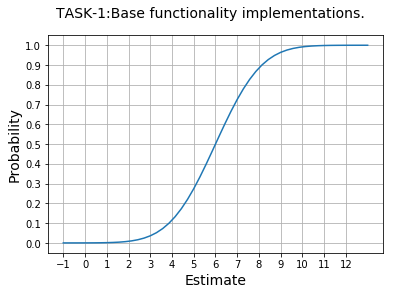

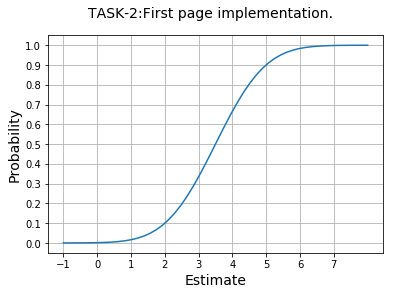

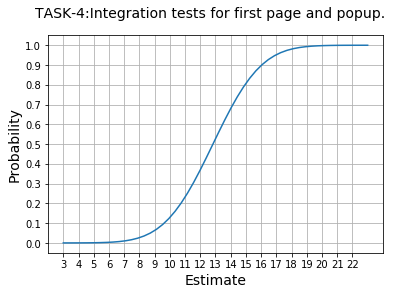

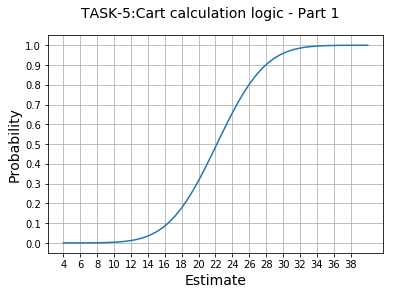

In [4]:
for task_row in valid_task_rows:
    work_estimation_console_adapter.print_normal_distribution_for_task(task_row)

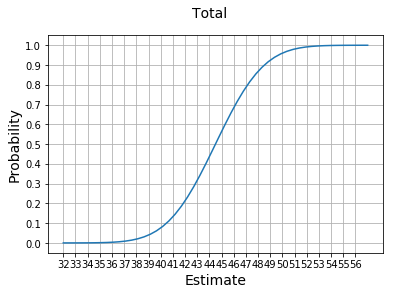

In [5]:
work_estimation_console_adapter.print_normal_distribution_for_tasks(valid_task_rows)

In [6]:
import pandas as pd

number_of_developers = 3
valid_tasks, task_errors = tasks_adapter_facade.adapt_use_normal_estimate(valid_task_rows)

print('Adapted valid {} tasks'.format(len(valid_tasks)))
print('--------------------------------------------')
for error in task_errors:
    print(error)
    
history_records = work_emulator_facade.emulate(number_of_developers, valid_tasks)

history_data = dict()
history_data['day'] = [history_record.day for history_record in history_records]

for first_cell in history_records[0].cells:
    history_data[first_cell.worker_name] = 

for history_record in history_records:
    print(str(history_record.day) + " " + str([cell.task_uid for cell in history_record.cells]))

Adapted valid 4 tasks
--------------------------------------------
1 ['TASK-2', 'TASK-1', 'TASK-4']
2 ['TASK-2', 'TASK-1', 'TASK-4']
3 ['TASK-2', 'TASK-1', 'TASK-4']
4 ['TASK-5', 'TASK-1', 'TASK-4']
5 ['TASK-5', 'TASK-1', 'TASK-4']
6 ['TASK-5', None, 'TASK-4']
7 ['TASK-5', None, 'TASK-4']
8 ['TASK-5', None, 'TASK-4']
9 ['TASK-5', None, 'TASK-4']
10 ['TASK-5', None, 'TASK-4']
11 ['TASK-5', None, 'TASK-4']
12 ['TASK-5', None, 'TASK-4']
13 ['TASK-5', None, 'TASK-4']
14 ['TASK-5', None, None]
15 ['TASK-5', None, None]
16 ['TASK-5', None, None]
17 ['TASK-5', None, None]
18 ['TASK-5', None, None]
19 ['TASK-5', None, None]
20 ['TASK-5', None, None]
21 ['TASK-5', None, None]
22 ['TASK-5', None, None]
23 ['TASK-5', None, None]
